 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4z> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



Optimal Distance is:  20.0


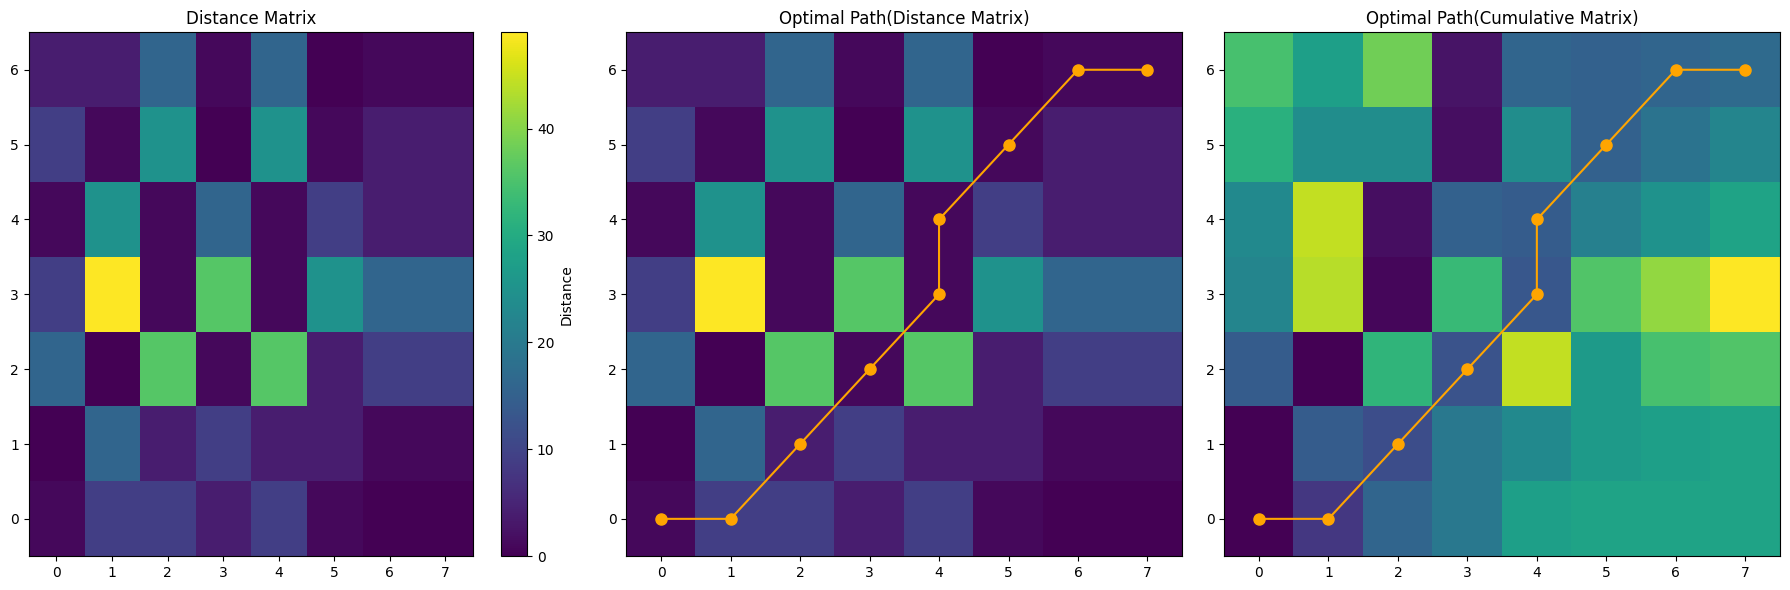

In [50]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def distance(x, y):
    return np.square(x - y)

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(x,y):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    dist_mat = np.zeros((len(x), len(y)))
    for i in range(len(x)):
      for j in range(len(y)):
          dist_mat[i, j] = distance(x[i], y[j])
    N, M = dist_mat.shape

    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],
                cost_mat[i, j + 1],
                cost_mat[i + 1, j]]
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            i = i - 1
        elif tb_type == 2:
            j = j - 1
        path.append((i, j))

    cost_mat = cost_mat[1:, 1:]
    opt_distance = cost_mat[N-1, M - 1]
    # print(opt_distance)
    return (opt_distance, path[::-1], cost_mat)




    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.




            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"








    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
 #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])



        # Add the current indexes distance
        # opt_distance = opt_distance +    #Compute the distance between the points sequence1[i] and sequence2[j]


        #Store the required indexes to obtain the optimal path




path, cumulative_matrix, cost_matrix = DTW([4,3,7,0,2,6,5], [3,7,1,6,1,5,4,4])
# print(opt_distance)
# print(path)


def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = distance(sequence1[i], sequence2[j])

    opt_distance, path, cumulative_matrix = DTW(sequence1, sequence2)
    path = np.array(path)
    print("Optimal Distance is: ", opt_distance)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(distance_matrix, cmap='viridis', origin='lower', aspect='auto')
    plt.title("Distance Matrix")
    plt.colorbar(label='Distance')

    # for i in range(len(sequence1)):
    #     for j in range(len(sequence2)):
    #         plt.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='black')



    plt.subplot(1, 3, 2)
    plt.imshow(distance_matrix, cmap='viridis', origin='lower', aspect='auto')
    plt.title("Optimal Path(Distance Matrix)")
    plt.plot(path[:, 1], path[:, 0], color='orange', marker='o', markersize=8)  # Reversed because of matrix indexing


    plt.subplot(1, 3, 3)
    plt.imshow(cumulative_matrix, cmap='viridis', origin='lower', aspect='auto')
    plt.title("Optimal Path(Cumulative Matrix)")
    plt.plot(path[:, 1], path[:, 0], color='orange', marker='o', markersize=8)  # Reversed because of matrix indexing

    # for i in range(len(path)):
    #     plt.text(path[i, 1], path[i, 0], f'{distance_matrix[int(path[i, 0]), int(path[i, 1])]:.2f}',
    #              ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()




    #Obtain the optimal path using "DTW" function



    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
plotDTWpath([4, 3, 7, 0, 2, 6, 5], [3, 7, 1, 6, 1, 5, 4, 4])



<b> Report your observations </b>

1. The DTW algorithm discovers the best matching path between two sequences, showcasing the association between elements in one sequence and elements in the other.

2. The optimal path derived from both the distance matrix and cumulative matrix remains consistent.

3. Employing a dynamic programming (DP) strategy, the DTW Algorithm prioritizes the most optimal path by minimizing distance across the distance matrix rather than employing a greedy approach.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [2]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# !rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
for i in range(10):
  string1 = f'recording{i}.wav'
  if os.path.isfile(string1):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
  else:
      print("Recording the digits")
      wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(string1, 16000, fp_arr) #Please change the name.


  wn = Audio(string1, autoplay=False)
  display(wn)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
for i in range(30):
  string1 = f'testrecording{i}.wav'
  if os.path.isfile(string1):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
  else:
      print("Recording the digits")
      wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(string1, 16000, fp_arr) #Please change the name.


  wn = Audio(string1, autoplay=False)
  display(wn)

Output hidden; open in https://colab.research.google.com to view.

**Algorithm to perform isolated digit recognition**

Link to the recordings

In [52]:
# Drive link to recordings: https://drive.google.com/drive/folders/1bXw2GpQcYZidH1Q747oO_46LE3L308fE?usp=sharing



In [8]:
# Function to move the files to a folder named recordings
import os
import numpy as np
import scipy.io.wavfile
from IPython.display import Audio, display
from google.colab import files


def download_recordings():
    import shutil
    folder_name = "recordings"
    os.makedirs(folder_name, exist_ok=True)

    for i in range(30):
        string1 = f'testrecording{i}.wav'
        if os.path.isfile(string1):
            print(f"Recording {i} exists.")

            custom_name = f"testrecording{i}.wav"
            os.rename(string1, os.path.join(folder_name, custom_name))
        else:
            print(f"Recording {i} not found.")


    shutil.make_archive(folder_name, 'zip', folder_name)


download_recordings()


Recording 0 exists.
Recording 1 exists.
Recording 2 exists.
Recording 3 exists.
Recording 4 exists.
Recording 5 exists.
Recording 6 exists.
Recording 7 exists.
Recording 8 exists.
Recording 9 exists.
Recording 10 exists.
Recording 11 exists.
Recording 12 exists.
Recording 13 exists.
Recording 14 exists.
Recording 15 exists.
Recording 16 exists.
Recording 17 exists.
Recording 18 exists.
Recording 19 exists.
Recording 20 exists.
Recording 21 exists.
Recording 22 exists.
Recording 23 exists.
Recording 24 exists.
Recording 25 exists.
Recording 26 exists.
Recording 27 exists.
Recording 28 exists.
Recording 29 exists.


In [9]:
def distance(point1, point2):
    return np.sum((point1 - point2)**2)

In [10]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################

    N, D = sequence1.shape
    M, D = sequence2.shape

    dist_mat = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            dist_mat[i,j] = np.sum((sequence1[i] - sequence2[j])**2)

    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],
                cost_mat[i, j + 1],
                cost_mat[i + 1, j]]
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            i = i - 1
        elif tb_type == 2:
            j = j - 1
        path.append((i, j))

    cost_mat = cost_mat[1:, 1:]
    opt_distance = cost_mat[N-1, M - 1]
    # print(opt_distance)
    return (opt_distance, path[::-1], cost_mat)






    # #######################################################
    # # Code snippet to create the cumulative distance matrix
    # #######################################################
    # # Initialize the cumulative distance matrix
    # DTW_cumulate_Matrix =    # cummulative distance matrix
    # #Iterate through the sequence of features in templates and compute the distance between the templates.
    # for i in range(1,len(sequence1),1): #you can start from 1
    #     for j in range(1,len(sequence2),1):
    #         current_distance =      # Compute the euclidean distance between the current feature vectors




    #         #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"








    # #######################################################
    # # Code snippet to find the optimal DTW path and the corresponding optimal distance
    # #######################################################
    # opt_distance = 0.0
    # i =  # length of the sequence1
    # j =  # length of the sequence2
    # while i!=0 and j!=0: #Start from the last point and backtrack
    #     #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
    #     #You may use "np.argmin for Eucludian (or np.argmax for cosine) " function for doing it


    #     # Add the current indexes distance
    #     opt_distance = opt_distance +    # Compute the euclidean distance  of feature vectors  Template1[i] and Template2[j]



    #     #Store the required indexes to obtain the optimal path








    # #######################################################
    # # Return optimal distance and optimal dtw path
    # #######################################################





def plotDTWpath2(sequence1,sequence2):
    #######################################################
    # Inputs : template1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    N, D = sequence1.shape
    M, D = sequence2.shape

    distance_matrix = np.zeros((N, M))
    for i in range(N):
      for j in range(M):
          distance_matrix[i, j] = np.sum((sequence1[i] - sequence2[j])**2)

    opt_distance, path, cost_matrix = vectorDTW(sequence1, sequence2)
    print("Optimal distance is:", opt_distance)
    path = np.array(path)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, cmap='viridis', origin='lower', aspect='auto')
    plt.title("Distance Matrix")
    plt.colorbar(label='Distance')

    # for i in range(N):
    #     for j in range(M):
    #         plt.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    plt.subplot(1, 2, 2)
    plt.imshow(distance_matrix, cmap='viridis', origin='lower', aspect='auto')
    plt.title("Optimal Path")
    plt.plot(path[:, 1], path[:, 0], color='orange', marker='o', markersize=8)  # Reversed because of matrix indexing

    # for i in range(len(path)):
    #     plt.text(path[i, 1], path[i, 0], f'{distance_matrix[int(path[i, 0]), int(path[i, 1])]:.2f}',
    #              ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()

    #Compute distance and cumulative distance between the given templates



    #Obtain the optimal path using "DTW" function



    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes




In [12]:
!pip install speechpy

In [13]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=fb635ef6f91c7f94bd7f5b4fef2ebc8fb171e158f9d6821c7dc054c5c9b8c48a
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [14]:
import os
import numpy as np
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy

tr_data = []
tr_label = range(10)
recordings_folder = "recordings"

for i in range(10):
    wavfile = os.path.join(recordings_folder, f'recording{i}.wav')
    if os.path.isfile(wavfile):
        (rate,sig) = wav.read(wavfile)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        tr_data.append(mfcc_feat_cmvn)
    else:
        print(f"Recording {i} not found in the folder.")




In [15]:
# print(tr_data)

[array([[ -0.29540062, -14.052424  , -13.667526  , ..., -27.977398  ,
         31.367554  ,  14.107448  ],
       [  2.1568274 , -14.144394  , -13.702928  , ..., -51.09624   ,
         28.833107  ,   6.8637867 ],
       [  0.23276071,  -9.490709  ,  -1.4523321 , ..., -43.117798  ,
         47.33077   ,  23.842295  ],
       ...,
       [ -1.5207664 ,   0.44562683, -12.562284  , ...,  25.191101  ,
         10.845099  ,   4.9486527 ],
       [ -1.2234608 ,   0.70305794,  -4.930158  , ...,   2.139121  ,
         23.123884  ,   4.960369  ],
       [ -1.03888   ,  -0.7233999 ,  -7.5377927 , ..., -12.662986  ,
         21.461655  ,   3.8815632 ]], dtype=float32), array([[ -5.6513624 ,   4.2306175 ,  11.158825  , ..., -28.35386   ,
        -19.25302   ,  16.66773   ],
       [ -5.555616  ,   3.7393064 ,  -1.4083531 , ..., -22.579056  ,
          2.1120818 ,  30.90645   ],
       [ -5.744645  ,   6.86364   ,   4.4976273 , ..., -12.25099   ,
         -4.0329003 ,  -0.5039954 ],
       ...,
    

In [16]:
import os
import numpy as np
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy

te_data = []
te_label = []

recordings_folder = "recordings"

for j in range(30):
    wavfile = os.path.join(recordings_folder, f'testrecording{j}.wav')
    if os.path.isfile(wavfile):
        (rate,sig) = wav.read(wavfile)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        te_data.append(mfcc_feat_cmvn)


        te_label.append(j // 3)
    else:
        print(f"Test recording {j} not found in the folder.")




In [45]:
# tr_label = list(tr_label)

In [46]:
# print(tr_label)

In [47]:
# print(te_label)

In [48]:
# print(tr_data)

**Plot the optimal DTW path**

In [44]:
# print(te_data)


In [22]:
te_pred = np.zeros((len(te_data),))

distances = np.zeros((len(tr_data), len(te_data)))
for i in range(len(te_data)):
    test_template = te_data[i]
    for n in range(len(tr_data)):
        train_template = tr_data[n]
        distances[n, i], _, _ = vectorDTW(train_template, test_template)

for i in range(len(te_data)):
    min_dist_index = np.argmin(distances[:, i])
    te_pred[i] = min_dist_index

for i in range(len(te_data)):
    plotDTWpath2(tr_data[int(te_pred[i])], te_data[i])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections



**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [23]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy
    #Compute the accuracy
    accuracy = np.count_nonzero((Y_test - Y_pred)==0)/Y_pred.shape[0]
    #Return the accuracy
    return accuracy

def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    confusion_matrix = np.zeros((10, 10), dtype=int)
    for i in range(len(true)):
        confusion_matrix[int(true[i])][int(pred[i])] += 1

    return confusion_matrix

Accuracy = Accuracy(te_label, te_pred)
confusion_matrix = compute_confusion_matrix(te_label, te_pred)

print(f'Digit Recongnition Accuracy: {Accuracy*100}%\n')
print(f'Confusion matrix:\n{confusion_matrix}')


Digit Recongnition Accuracy: 86.66666666666667%

Confusion matrix:
[[3 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 3 0 0 0 0 0 0 0 0]]


Detailed Observations:

- Digits 0 through 5 are accurately classified, each with 3 instances correctly identified. This indicates the model's effectiveness in distinguishing between these digits.

- Digit 6 is correctly classified in all 3 instances, showing consistent recognition.

- Digit 7 is correctly classified in all 3 instances, demonstrating accurate identification.

- Digit 8 is correctly classified in all 3 instances, indicating reliable recognition.

- Digit 9 is mostly correctly classified, with 3 out of 4 instances correctly identified. There is one misclassification where digit 9 is classified as digit 1, suggesting some confusion between these two digits.

Overall, the model achieves a high accuracy of 86.67%, with minor confusion between digits 1 and 9.


<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
# All imports

# Drive link to folder: https://drive.google.com/drive/folders/1fHGESfko6JxmLmzt7ATNfY87EaYjXDHr?usp=sharing
import os
import numpy as np
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy


data_dir = '/content/drive/My Drive/MultiSpeakerDigitData_modified'


def wav_to_mfcc(wavfile):
    (rate, sig) = wav.read(wavfile)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    return mfcc_feat_cmvn


training_data = {}
testing_data = {}
training_targets = {}
testing_targets = {}


for person_folder in os.listdir(data_dir):
    person_dir = os.path.join(data_dir, person_folder)
    train_data = []
    test_data = []
    train_targets = []
    test_targets = []

    for wavfile in os.listdir(person_dir):
        parts = wavfile.split('_')
        digit = parts[0]
        serial_number = int(parts[2].split('.')[0])

        mfcc_features = wav_to_mfcc(os.path.join(person_dir, wavfile))
        if serial_number == 6:
            train_data.append(mfcc_features)
            train_targets.append(int(digit))
        else:
            test_data.append(mfcc_features)
            test_targets.append(int(digit))

    person_name = parts[1]
    training_data[person_name] = train_data
    testing_data[person_name] = test_data
    training_targets[person_name] = train_targets
    testing_targets[person_name] = test_targets


In [42]:
def predict_labels(test_data, training_data, training_targets):
    N_te = len(test_data)
    te_pred = -np.ones((N_te,))
    for i in range(N_te):
        min_op_dist = np.inf
        pred = -1
        test_template = test_data[i]
        for n in range(10):
            tr_template = training_data[n]
            op_dist, _, _ = vectorDTW(tr_template, test_template)
            if op_dist < min_op_dist:
                min_op_dist = op_dist
                pred = training_targets[n]
        te_pred[i] = pred
    return te_pred

def evaluate_accuracy(test_targets, predicted_targets):
    correct_predictions = np.sum(test_targets == predicted_targets)
    total_predictions = len(test_targets)
    accuracy = correct_predictions / total_predictions
    return accuracy

speakers = {
    "Theo": (testing_data["Theo"], training_data["Theo"], training_targets["Theo"]),
    "Nicolas": (testing_data["Nicolas"], training_data["Nicolas"], training_targets["Nicolas"]),
    "Jackson": (testing_data["Jackson"], training_data["Jackson"], training_targets["Jackson"]),
    "Yweweler": (testing_data["Yweweler"], training_data["Yweweler"], training_targets["Yweweler"])
}

print("Performance evaluation of Isolated digit recognition system on TDIGITS data:\n")

for speaker, data in speakers.items():
    test_data, training_data, training_targets = data
    te_pred = predict_labels(test_data, training_data, training_targets)
    accuracy = evaluate_accuracy(testing_targets[speaker.capitalize()], te_pred)
    print(f"Accuracy for {speaker.capitalize()}: {accuracy * 100}%")


print("\nPerformance evaluation when the reference and the test signal are from different speakers:\n")

for test_speaker, test_data_info in speakers.items():
    for ref_speaker, ref_data_info in speakers.items():
        if test_speaker != ref_speaker:
            test_data, _, _ = test_data_info
            _, training_data, training_targets = ref_data_info
            te_pred = predict_labels(test_data, training_data, training_targets)
            accuracy = evaluate_accuracy(testing_targets[test_speaker.capitalize()], te_pred)
            print(f"For {test_speaker.capitalize()}(Testing) - {ref_speaker.capitalize()}(Referencing): {accuracy * 100}%")



Performance evaluation of Isolated digit recognition system on TDIGITS data:

Accuracy for Theo: 96.93877551020408%
Accuracy for Nicolas: 74.08163265306122%
Accuracy for Jackson: 96.53061224489797%
Accuracy for Yweweler: 85.3061224489796%

Performance evaluation when the reference and the test signal are from different speakers:

For Theo(Testing) - Nicolas(Referencing): 34.48979591836735%
For Theo(Testing) - Jackson(Referencing): 49.38775510204081%
For Theo(Testing) - Yweweler(Referencing): 56.12244897959183%
For Nicolas(Testing) - Theo(Referencing): 42.857142857142854%
For Nicolas(Testing) - Jackson(Referencing): 27.346938775510203%
For Nicolas(Testing) - Yweweler(Referencing): 27.142857142857142%
For Jackson(Testing) - Theo(Referencing): 77.14285714285715%
For Jackson(Testing) - Nicolas(Referencing): 21.428571428571427%
For Jackson(Testing) - Yweweler(Referencing): 52.85714285714286%
For Yweweler(Testing) - Theo(Referencing): 47.55102040816326%
For Yweweler(Testing) - Nicolas(Refere

<b> Some Methods to Improve Performance </b>

1. **Optimize DTW Parameters:**
   - Experiment with different distance metrics (e.g., Euclidean, Cosine) to find the most suitable one for digit recognition.
   - Tune DTW-specific parameters such as the windowing technique (e.g., global, Sakoe-Chiba, Itakura) and the window size to better align digit sequences.

2. **Feature Engineering:**
   - Explore alternative feature representations for digit sequences, such as different types of time-frequency representations or handcrafted features tailored specifically for digit recognition tasks.

3. **Data Preprocessing:**
   - Preprocess digit sequences to reduce noise and variability, which can improve alignment accuracy. Techniques like noise removal, normalization, and feature scaling may be beneficial.

4. **Temporal Context:**
   - Incorporate temporal context into the DTW algorithm by considering not only individual digits but also the sequential order of digits in the input sequences. This can improve recognition accuracy, especially in cases of noisy or ambiguous digit sequences.

5. **Ensemble Techniques:**
   - Combine multiple DTW classifiers trained on different subsets of data or with different parameter settings using ensemble methods (e.g., bagging, boosting) to improve overall performance and robustness.

6. **Post-processing Techniques:**
   - Apply post-processing techniques such as voting schemes or consensus methods to refine the results of DTW-based digit recognition, especially in scenarios where multiple candidate alignments are produced.

